In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/Classroom/projects/Mercari")
!ls -l

total 7705665
-rw------- 1 root root        151 Nov 19 17:35  akarshan.1711@gmail.com_CS1.gdoc
-rw------- 1 root root     192263 Jan  2 21:08 'Copy of HptTfidf2.ipynb'
-rw------- 1 root root    2441752 Dec 20 16:29  EDA.ipynb
-rw------- 1 root root      14393 Dec 27 21:06  FE+prep+modelling.ipynb
-rw------- 1 root root      30163 Dec 29 18:34  HptBrnandImpute.v1.0.ipynb
-rw------- 1 root root     249493 Jan  2 22:07  HptTfidf2.ipynb
-rw------- 1 root root     192396 Jan  2 22:08  HptTfidf.ipynb
-rw------- 1 root root  117131678 Jan  1 12:07  lgbt2.csv
-rw------- 1 root root     927353 Dec 28 15:17  mercari_mainV2.ipynb
-rw------- 1 root root     380928 Jan  2 21:54  Mercari_to3.db
-rw------- 1 root root      77824 Jan  2 14:07  Mercari_to4.db
-rw------- 1 root root     249856 Jan  2 20:56  Mercari_to5.db
-rw------- 1 root root     196608 Jan  2 21:08  Mercari_to6.db
-rw------- 1 root root   11853944 Dec 30 21:08  price_log2.pickle
-rw------- 1 root root   11853944 Dec 31 07:52  price_l

In [ ]:
#importing modules/libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import sys
import os
import psutil
# from scipy.stats import randint as sp_randint
# from scipy.stats import uniform as sp_uniform


from tqdm.notebook import tqdm
# from collections import Counter
# from collections import defaultdict 
import re
import random
# from random import sample
# from bs4 import BeautifulSoup
import pickle
import inspect
import time

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.linear_model import Lasso,Ridge


# import string
# # import emoji
# # from wordcloud import WordCloud 
# import nltk
# nltk.download("stopwords")
# # nltk.download("brown")
# # nltk.download("names")
# # nltk.download('punkt')
# nltk.download('wordnet')
# # nltk.download('averaged_perceptron_tagger')
# # nltk.download('universal_tagset')
# # from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer
# # from nltk.stem.porter import PorterStemmer





import warnings
warnings.filterwarnings("ignore")

In [ ]:
# defining root mean square error over Log transformed y_test data
# (as linear models homoscedasticity can be kept in check for better prediction) 
# and hence an effective Root Mean Square Log Error
def error(y_test, predictions): 
  return np.sqrt(mean_squared_error( y_test, predictions ))

In [ ]:
# making a submmissin file compatible with kaggels submission format
def submission(model, file_name):
  test_pr = pd.read_csv('test_stg2.tsv.zip',sep='\t',usecols = ['test_id'] )
  with open('tfidf.pickle','rb') as f:
    data = pickle.load(f)
  # loading only the test data that does not have a target values/ test data from kaggle
  data = data[1481661:,:]
  # making prediciton on them and saving them with tets id
  test_pr['price'] = np.expm1(model.predict(data))
  test_pr.to_csv(file_name+'.csv')

In [ ]:
tr_len = 1185329# demarkation of cv data(0.8 percent)
whole_tr = 1481661# whole train data

In [ ]:
with open('tfidf.pickle','rb') as f:
  df=pickle.load(f)
with open('price_log.pickle','rb') as f:
  y=pickle.load(f)

In [ ]:
df = df[:whole_tr] # only taking train and cv data
gc.collect()

0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df,y, train_size = round(0.8*df.shape[0]))

In [ ]:
model= Ridge(alpha=4.5, max_iter=10000, tol=0.0005, solver='auto', random_state=34)
model.fit(X_train, Y_train)
op_rdg1 = model.predict(X_test)

In [ ]:
with open('ridge_weights','wb') as f:
  pickle.dump(model,f)

In [ ]:
error(op_rdg1,Y_test)

0.4417180108419465

In [ ]:
# this submission helped me achieve 0.4488 rmsle on kaggle
submission(modle,'ridge')

In [ ]:
gc.collect()
lgbt =  lgb.LGBMRegressor(boosting_type='gbdt', objective='regression',
                                   random_state=11, n_jobs=4, subsample_for_bin=81920,
                                   learning_rate=0.19989416216581643, num_leaves=137, max_depth=40, n_estimators=2194)
lgbt.fit(X_train, Y_train)

op_lgb1 = lgbt.predict(X_test) 

In [ ]:
# this submission helped me achieve 0.4299 rmsle on kaggle
error(op_lgb1,Y_test)

0.4205513051599854

In [ ]:
with open('lbgm_coeffs','wb') as f:
  pickle.dump(lgbt,f)

In [ ]:
submission(lgbt,'lgbt2')

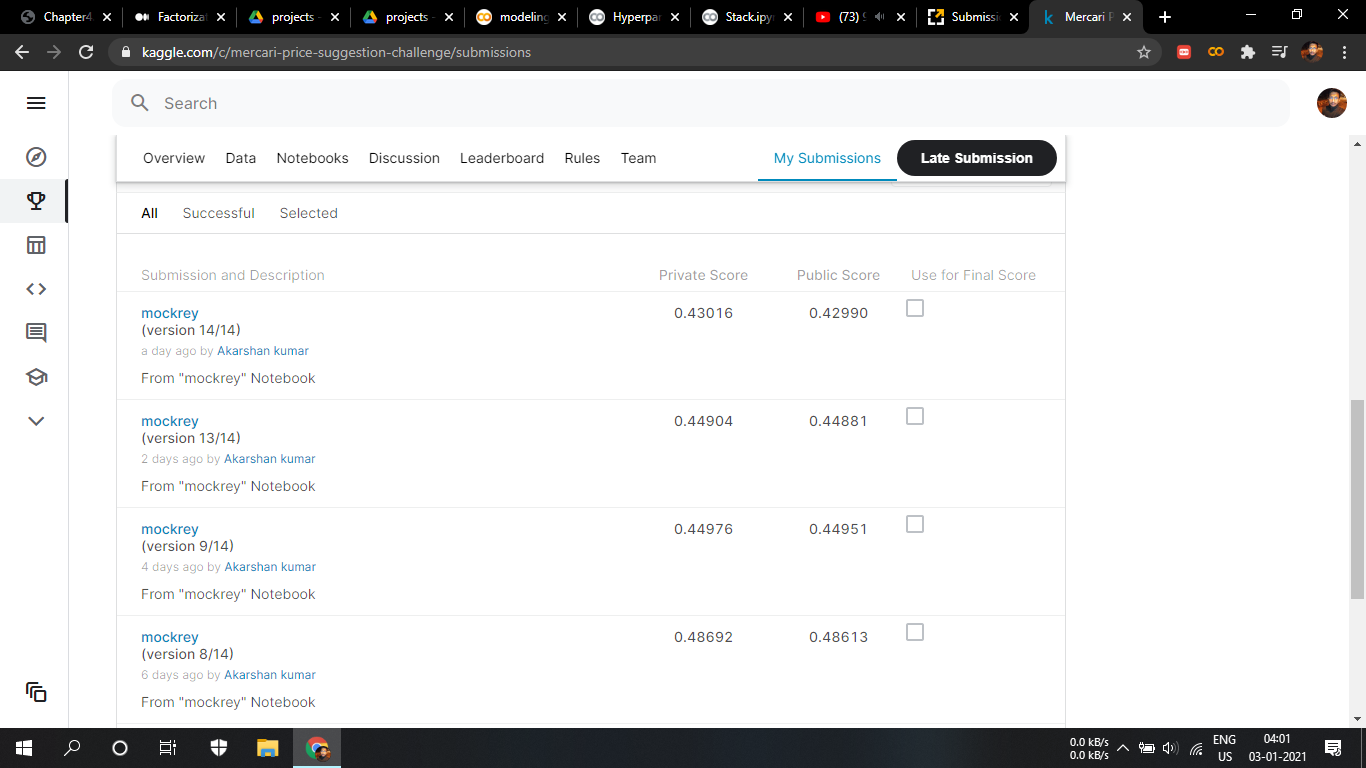

The Leaderboard

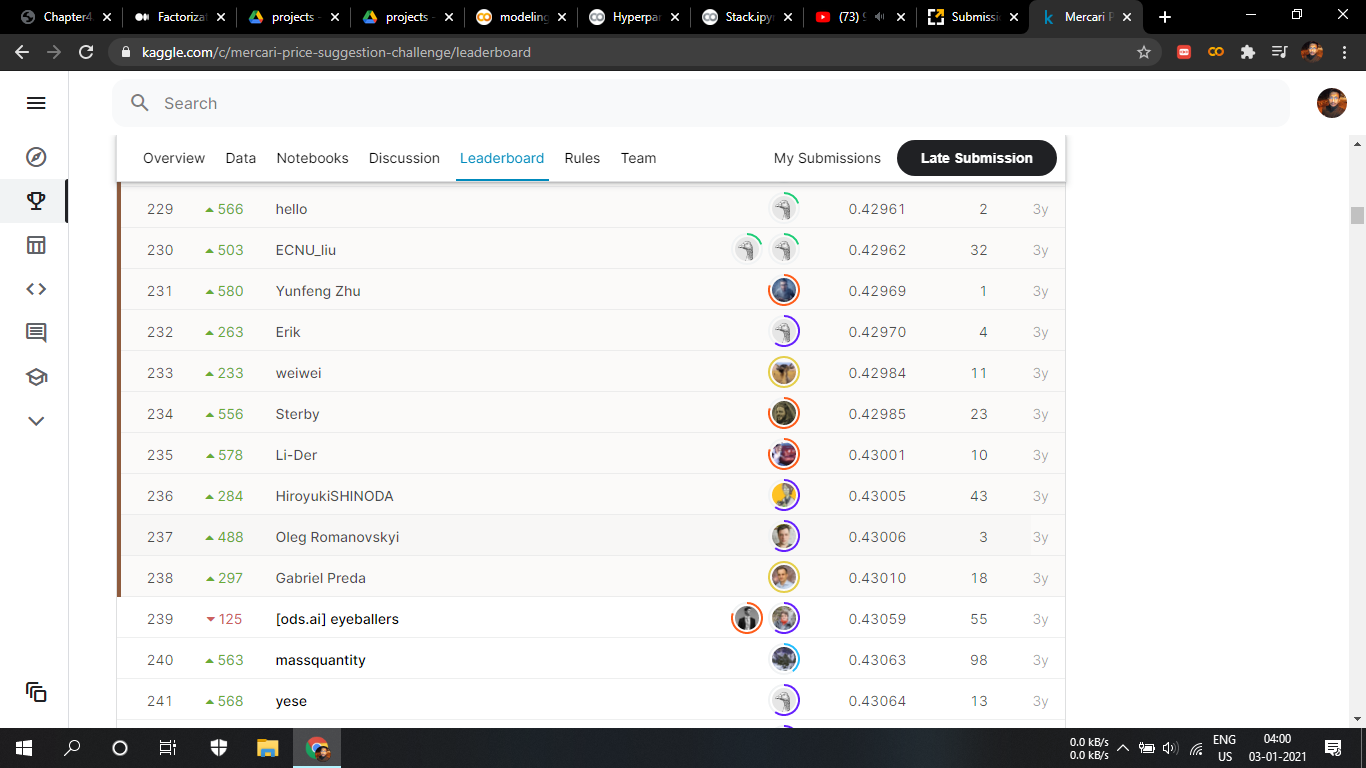

In [ ]:
gc.collect()
lgbt =  lgb.LGBMRegressor(boosting_type='gbdt',
                                   random_state=11, n_jobs=4, subsample_for_bin=196892,
                                   learning_rate=0.17944470650238377, num_leaves=167, max_depth=37, n_estimators=2016)
lgbt.fit(X_train, Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=40,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=2200, n_jobs=4, num_leaves=140, objective=None,
              random_state=11, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=196892, subsample_freq=0)

In [ ]:
# second best lgbm model
op_lgb1 = lgbt.predict(X_test)
error(op_lgb1,Y_test)

0.4210177447417679

stacking/ weighted sum of prices

In [ ]:
lgbm = pd.read_csv('lgbt2.csv',usecols=['test_id','price'])
ridge = pd.read_csv('ridge.csv',usecols=['test_id','price'])

In [ ]:
lg_err = 0.4209546895125615
rdg_err = 0.4417180108419465
tot = lg_err+rdg_err

In [ ]:
new_price = lgbm['price']*rdg_err/tot +ridge['price']*lg_err/tot 

In [ ]:
print(ridge['price'],new_price,lgbm['price'])

In [ ]:
ridge['price']=new_price
ridge.to_csv('new_price.csv')

This submission helped me achieve under 6 percentile on in the compition.

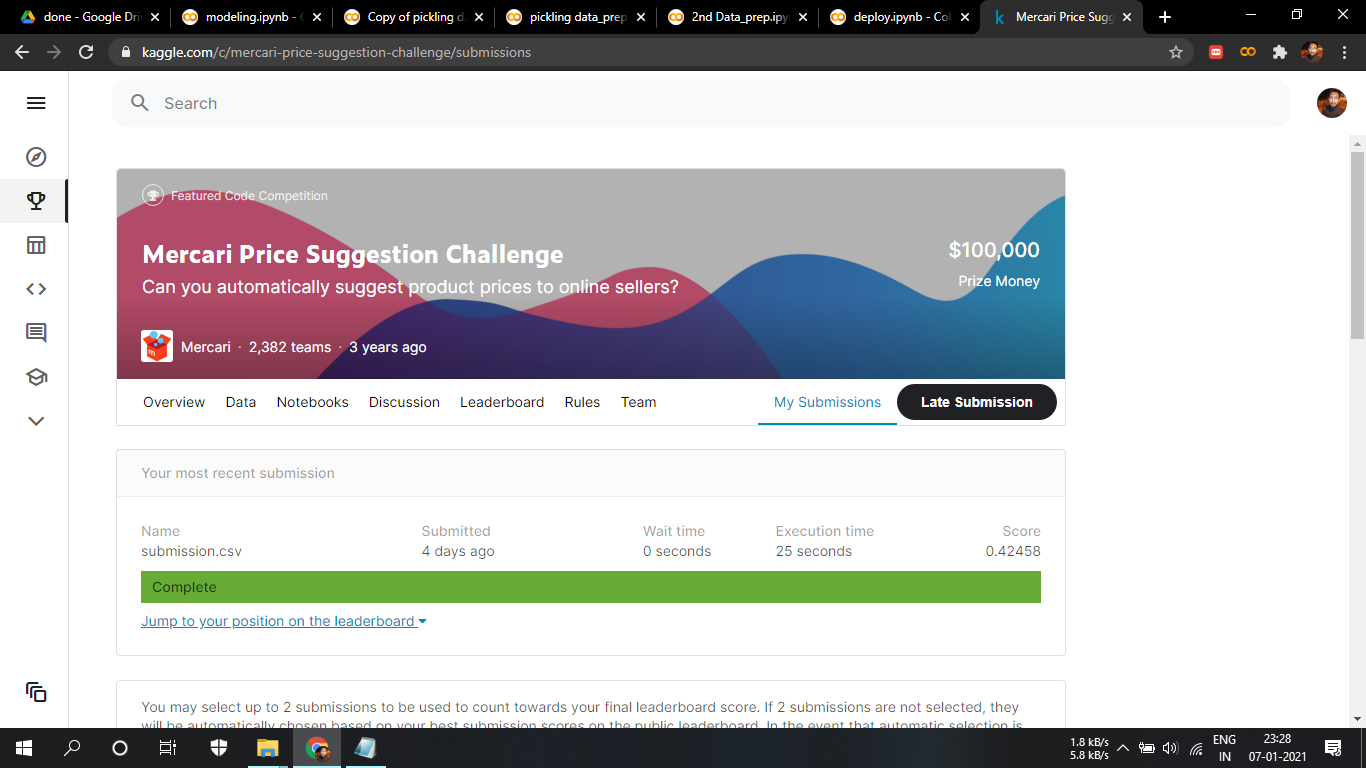